# IMPORTING MODULES

### Download The dataset from kaggle
### link:https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# DATA PROCESSING

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
 'train',
 labels="inferred",
 label_mode="categorical",
 class_names=None,
 color_mode="rgb",
 batch_size=6,
 image_size=(128, 128),
 shuffle=True,
 seed=None,
 validation_split=None,
 subset=None,
 interpolation="bilinear",
 follow_links=False,
 crop_to_aspect_ratio=False)

Found 480 files belonging to 19 classes.


In [4]:

validation_set = tf.keras.utils.image_dataset_from_directory(
'valid',
labels="inferred",
label_mode="categorical",
class_names=None,
color_mode="rgb",
batch_size=6,
image_size=(128, 128),
shuffle=True,
seed=None,
validation_split=None,
subset=None,
interpolation="bilinear",
follow_links=False,
crop_to_aspect_ratio=False)

Found 160 files belonging to 19 classes.


In [5]:
for x,y in training_set:
    
    print(x,x.shape)
    print(y,y.shape)
    break
class_names = training_set.class_names
print(class_names)

tf.Tensor(
[[[[ 55.5   53.    75.5 ]
   [107.5  101.5  137.5 ]
   [117.   109.   157.  ]
   ...
   [107.    94.   122.  ]
   [103.75  90.75 118.75]
   [100.75  87.75 115.75]]

  [[ 54.5   52.5   74.5 ]
   [107.5  101.5  137.5 ]
   [115.   107.   155.  ]
   ...
   [102.5   89.5  117.5 ]
   [103.75  90.75 118.75]
   [104.    91.   119.  ]]

  [[ 57.75  54.75  77.75]
   [113.   107.   143.  ]
   [117.   109.   157.  ]
   ...
   [109.75  96.75 124.75]
   [108.75  95.75 123.75]
   [102.75  89.75 117.75]]

  ...

  [[ 54.    48.5   69.5 ]
   [119.25 109.25 144.75]
   [105.75  93.75 140.75]
   ...
   [117.   103.   136.  ]
   [110.75  96.75 129.75]
   [112.75  98.75 131.75]]

  [[ 56.    49.75  71.5 ]
   [113.75 103.75 139.25]
   [107.5   95.5  142.5 ]
   ...
   [117.5  103.5  136.5 ]
   [110.25  96.25 129.25]
   [110.25  96.25 129.25]]

  [[ 67.75  62.25  83.25]
   [117.75 107.75 143.25]
   [116.25 104.25 151.25]
   ...
   [110.    96.   129.  ]
   [108.25  94.25 127.25]
   [105.75  91.75 12

# Data Exploration

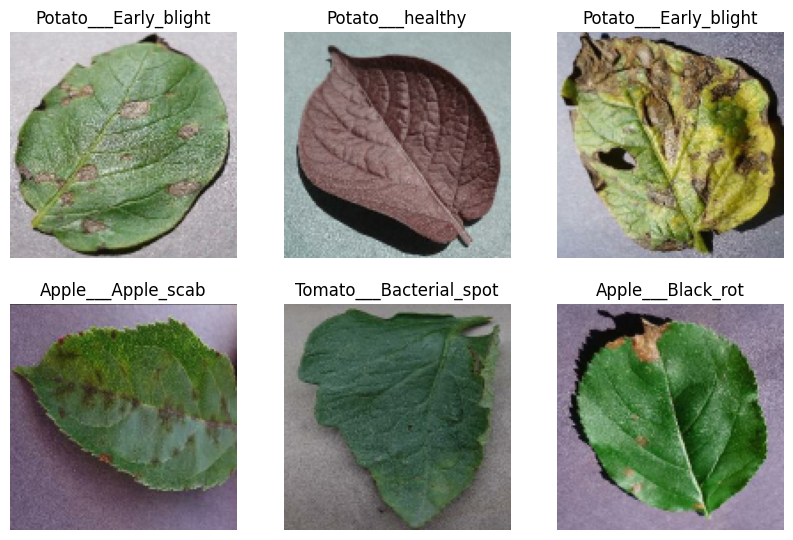

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in training_set.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 4)
        plt.imshow(images[i].numpy().astype("uint8"))
        label_index=tf.argmax(labels[i]).numpy()
        plt.title(class_names[label_index])
        plt.axis("off")
    plt.show()
 
 

# MODEL BUILDING

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
 # Load the pre-trained ResNet50 model without the top layer
pretrained_model = tf.keras.applications.ResNet50(include_top=False,input_shape=(128, 128, 3),pooling='avg',weights='imagenet')
 
# Freeze the layers of the pre-trained model
for layer in pretrained_model.layers:
    layer.trainable = False
 
# Define the input layer
inputs = Input(shape=(128, 128, 3))
 
# Pass the inputs through the pre-trained model
x = pretrained_model(inputs)
 
# Add custom layers on top
x = Dense(512, activation='relu')(x)
outputs = Dense(19, activation='softmax')(x)
 
# Create the final model
resnet_model = Model(inputs, outputs)
 

In [8]:
# Display the model summary
resnet_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 19)             │         9,747 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,646,547 (94.02 MB)

 Trainable params: 1,058,835 (4.04 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

# Compiling the model

In [9]:
 # Use sparse categorical crossentropy if your labels are integers
resnet_model.compile(optimizer=Adam(learning_rate=0.001),
loss='categorical_crossentropy',
metrics=['accuracy'])

# Training The Model

In [10]:
epochs=10
history = resnet_model.fit(
training_set,
validation_data=validation_set,
epochs=epochs
)
 

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 17s 159ms/step - accuracy: 0.3221 - loss: 2.8874 - val_accuracy: 0.8813 - val_loss: 0.4119
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 15s 191ms/step - accuracy: 0.8855 - loss: 0.3905 - val_accuracy: 0.9125 - val_loss: 0.2678
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 15s 193ms/step - accuracy: 0.9462 - loss: 0.2022 - val_accuracy: 0.9688 - val_loss: 0.0962
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 16s 200ms/step - accuracy: 0.9897 - loss: 0.0772 - val_accuracy: 0.9875 - val_loss: 0.0394
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 17s 211ms/step - accuracy: 0.9633 - loss: 0.0824 - val_accuracy: 0.9875 - val_loss: 0.0337
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 16s 197ms/step - accuracy: 0.9850 - loss: 0.0720 - val_accuracy: 1.0000 - val_loss: 0.0168
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 16s 204ms/step - accuracy: 1.0000 - loss: 0.0170 - val_accuracy: 1.0000 - val_loss: 0.0078
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 17s 212ms/step - accuracy: 1.0000 - loss: 0.0060 - val_accu

# SAVING THE MODE

In [11]:
resnet_model.save('D:/Project/trained_plant_disease_model.keras')
history.history #Return Dictionary of history
 

{'accuracy': [0.4833333194255829,
  0.8708333373069763,
  0.9437500238418579,
  0.9895833134651184,
  0.9708333611488342,
  0.9854166507720947,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [1.9673551321029663,
  0.3924635946750641,
  0.19344979524612427,
  0.0663437694311142,
  0.07375140488147736,
  0.05477258935570717,
  0.016686316579580307,
  0.005457361228764057,
  0.005634515546262264,
  0.0031309525948017836],
 'val_accuracy': [0.8812500238418579,
  0.9125000238418579,
  0.96875,
  0.987500011920929,
  0.987500011920929,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.4118877053260803,
  0.2677695155143738,
  0.09616954624652863,
  0.039375390857458115,
  0.0337153784930706,
  0.01677076146006584,
  0.007766446564346552,
  0.003587068524211645,
  0.0032555453944951296,
  0.0023446667473763227]}

In [12]:
#Recording History in json
import json
with open('D:/Project/training_hist.json','w') as f:
   json.dump(history.history,f)


# VISUALIZING TRAINING RESULTS

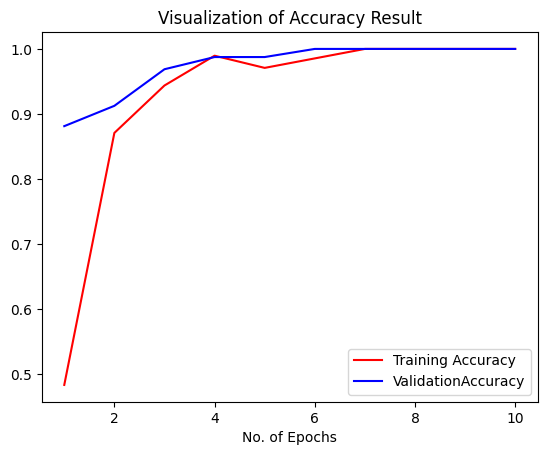

In [13]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'],color='blue',label='ValidationAccuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# TESTING

In [42]:
test_set = tf.keras.utils.image_dataset_from_directory(
 'test',
 labels="inferred",
 label_mode="categorical",
 class_names=None,
 color_mode="rgb",
 batch_size=6,
 image_size=(128, 128),
 shuffle=True,
 seed=None,
 validation_split=None,
 subset=None,
 interpolation="bilinear",
 follow_links=False,
 crop_to_aspect_ratio=False)

Found 5441 files belonging to 19 classes.


In [53]:
# Load the test dataset
import tensorflow as tf
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
'test',
target_size=(128, 128),
batch_size=6,
class_mode='categorical'
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
'test',
target_size=(224,224),
batch_size=6,
class_mode='categorical')

Found 5441 images belonging to 19 classes.
Found 5441 images belonging to 19 classes.


In [54]:
#Test Image Visualization
import matplotlib.pyplot as plt
import cv2
image_path = 'test/Potato___Late_blight/0c2628d4-8d64-48a9-a157-19a9c902e304___RS_LB 4590.JPG'
 # Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

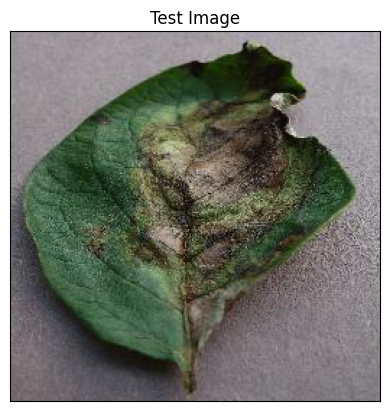

In [55]:
 # Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [57]:
import tensorflow as tf
import numpy as np
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) # Convert single image to a batch.
predictions = resnet_model.predict(input_arr)
predictions.shape
print(input_arr.shape)
print(predictions)
result_index = np.argmax(predictions) #Return index of max element
print(result_index)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
(1, 128, 128, 3)
[[3.9619334e-08 2.4960286e-06 5.3573188e-11 3.7894856e-07 2.5059793e-02
  9.7492015e-01 4.9665577e-10 1.8952859e-07 1.3622120e-10 4.3360440e-09
  1.4043179e-05 2.3832290e-06 5.7134805e-12 4.9805487e-07 4.7501201e-13
  1.8544457e-09 7.9637633e-12 4.2720327e-15 6.5684048e-08]]
5


In [59]:
# Check the length of class_name
class_name_length = len(class_names)
print(f"Length of class_name: {class_name_length}")

Length of class_name: 19


# Prediction

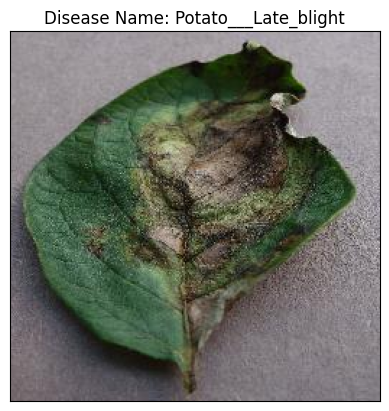

In [62]:

# Adjust result_index if needed
if 0 <= result_index < class_name_length:
    model_prediction = class_names[result_index]
    plt.imshow(img)
    plt.title(f"Disease Name: {model_prediction}")
    plt.xticks([])
    plt.yticks([])
    plt.show()   
else:
    result_index = min(max(result_index, 0), class_name_length-1)
    model_prediction = class_names[result_index]
    plt.imshow(img)
    plt.title(f"Disease Name: {model_prediction}")
    plt.xticks([])
    plt.yticks([])
    plt.show()


    
 # If result_index is out of range, adjust it to be within the valid range
 
    
  
